<a href="https://colab.research.google.com/github/vishh17/DS/blob/master/Churn_Modelling_Using_XGBoost_Hyperparmeter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Connect GDrive and Colab
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os 
import numpy as np

In [ ]:
current_path= os.getcwd()
current_path

'/content'

In [ ]:
# Read dataset from csv
current_path= os.getcwd()
df = pd.read_csv(current_path +'/gdrive/My Drive/ML_Projects/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check if any null values are present
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# convert categorical values ('Geography and Gender') into one-hot encodeing

Geography= pd.get_dummies(df['Geography'],drop_first= True)

In [ ]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
# convert categorical values ('Gender') into one-hot encodeing

Gender= pd.get_dummies(df['Gender'], drop_first= True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
# Drop the variable Geography and Gender from dataset

df= df.drop(['Geography', 'Gender'], axis=1)

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


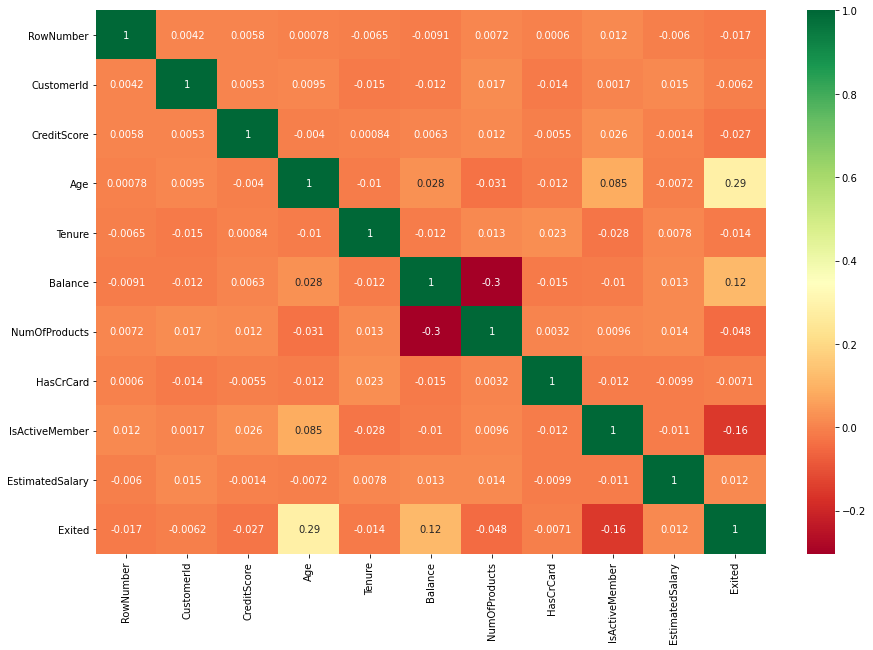

In [ ]:
# creat a correlation chart to see the correlation between the response and predicted variable
import seaborn as sns
import matplotlib.pyplot as plt

#get the  correlation of  each varaible
df_corr= df.corr()
top_features= df_corr.index

plt.figure(figsize=(15,10))

# plot heatmap
sns.heatmap(df[top_features].corr(), annot=True, cmap="RdYlGn" )


In [ ]:
# drop the variable RowNumber, CustomerId, Surname since they are not usefull for the predicting

df =df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Split the data into X variable
X= df.iloc[:,1:-1]
X.head(5)

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,42,2,0.00,1,1,1,101348.88
1,41,1,83807.86,1,0,1,112542.58
2,42,8,159660.80,3,1,0,113931.57
3,39,1,0.00,2,0,0,93826.63
4,43,2,125510.82,1,1,1,79084.10


In [ ]:
# split data into y variables
y= df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Concate the Geography and Gender
X= pd.concat([X, Geography,Gender], axis=1)
X.head(5)

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,42,2,0.00,1,1,1,101348.88,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,1,0
2,42,8,159660.80,3,1,0,113931.57,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.33, random_state= 42)

print(X_train.shape)
print(y_train.shape)

print('**************************')
print(X_test.shape)
print(y_test.shape)

(6700, 10)
(6700,)
**************************
(3300, 10)
(3300,)


# XGBoost without hyperparameter tunning


In [ ]:
# import xgboost classifier as we are doing classification problem
from xgboost import  XGBClassifier
xgb= XGBClassifier()


In [ ]:
# fit the model with training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predict the data model with test data
y_predict= xgb.predict(X_test)

In [ ]:
# Accuracy and confusing matrix cheeck

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy score', accuracy_score(y_test, y_predict))

print(classification_report(y_test, y_predict))

print('confusion_matrix')
print(pd.crosstab(y_test, y_predict))

accuracy score 0.8657575757575757
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.75      0.47      0.58       643

    accuracy                           0.87      3300
   macro avg       0.82      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300

confusion_matrix
col_0      0    1
Exited           
0       2557  100
1        343  300


Conclusion: We got an accquracy of 86 % without doing any hyperparementer tunning for XGBoost

# XGBoost with HyperParameter tunning

General Approach for Parameter Tuning

We will use an approach similar to that of GBM here. The various steps to be performed are:

    Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    
    Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
    
    Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
    Lower the learning rate and decide the optimal parameters .

Let us look at a more detailed step by step approach.

    max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
        
    min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
        
    gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
        
    subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
        
    scale_pos_weight = 1: Because of high class imbalance.

# Hyperparameter using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Define the parameter for XGBosst

max_depth =[ int(i) for i in range(2,10)]
min_child_weight= [ int(i) for i in range(2, 15)]
colsample_bytree= [i/10.0 for i in range(6,10)]

subsample = [i/100 for i in range(30,80,5)]
gamma=  [ i/10 for i in range(0,5)]
reg_alpha= [1e-5, 1e-2, 0.1, 1, 100]
learning_rate= [0.01, 0.05]
n_estimators=  [int(i) for i in np.linspace(100, 500,10)]


In [ ]:
colsample_bytree

[0.6, 0.7, 0.8, 0.9]

In [ ]:
rand_parm= {
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'colsample_bytree': colsample_bytree,
    'subsample': subsample,
    'gamma': gamma,
    'reg_alpha': reg_alpha,
    'learning_rate': learning_rate,
    'n_estimators': n_estimators 
    
}

In [ ]:
xgb= XGBClassifier()
random_searchcv= RandomizedSearchCV(estimator=xgb, param_distributions=rand_parm, n_iter=100, cv=5,verbose= 3, n_jobs=-1 )


In [ ]:
# fit on the  X_train

random_searchcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                           

In [ ]:
random_searchcv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 411,
 'reg_alpha': 1,
 'subsample': 0.35}

In [ ]:
best_random_search= random_searchcv.best_estimator_
best_random_search

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=411, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.35, verbosity=1)

In [ ]:
# predict with X_test
y_predict= best_random_search.predict(X_test)


In [ ]:
# Accuracy check for  XGBoost with RandomSearchCV

print('Accuracy Score{}'.format(accuracy_score(y_test, y_predict)))
print('confusion matrix \n', confusion_matrix(y_test, y_predict))

print('classification score \n {}', format(classification_report(y_test, y_predict)))


Accuracy Score0.8672727272727273
confusion matrix 
 [[2562   95]
 [ 343  300]]
classification score 
 {}               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.76      0.47      0.58       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.75      3300
weighted avg       0.86      0.87      0.85      3300



Conclusion: Accuracy score  with Randomized alog is 86.72, which is (86.72-86.24)= 0.48 increase in the previous model without Hyperparameter

# GridSearch on the parameters identified from RandomSearchCV

In [ ]:
random_searchcv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 411,
 'reg_alpha': 1,
 'subsample': 0.35}

In [ ]:
[[random_searchcv.best_params_['subsample']],
                  [random_searchcv.best_params_['subsample']+0.10],
                  [random_searchcv.best_params_['subsample']+0.20]]

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'reg_alpha': [random_searchcv.best_params_['reg_alpha']],
    'gamma': [random_searchcv.best_params_['gamma']],
    'subsample': [random_searchcv.best_params_['subsample'],
                  random_searchcv.best_params_['subsample']+0.10,
                  random_searchcv.best_params_['subsample']+0.20],
    'n_estimators': [random_searchcv.best_params_['n_estimators'],
                          random_searchcv.best_params_['n_estimators']-150,
                              random_searchcv.best_params_['n_estimators']- 200],
     
    'min_child_weight':[ random_searchcv.best_params_['min_child_weight'],
                          random_searchcv.best_params_['min_child_weight']+1,
                                 random_searchcv.best_params_['min_child_weight']+2,
                                    random_searchcv.best_params_['min_child_weight']+3],
    
    'max_depth':[ random_searchcv.best_params_['max_depth'],
                          random_searchcv.best_params_['max_depth']+1,
                                 random_searchcv.best_params_['max_depth']+2,
                                    random_searchcv.best_params_['max_depth']+3,
                                            random_searchcv.best_params_['max_depth']-1],
    'colsample_bytree': [random_searchcv.best_params_['colsample_bytree'],  
                                  random_searchcv.best_params_['colsample_bytree']+0.2,
                                       random_searchcv.best_params_['colsample_bytree']+0.05,
                                             random_searchcv.best_params_['colsample_bytree']-0.1],
            
     'learning_rate':[ random_searchcv.best_params_['learning_rate'],
                          random_searchcv.best_params_['learning_rate']+0.015,
                                 random_searchcv.best_params_['learning_rate']+ 0.025]
                  
    
    
    }
      
    

In [ ]:
xgb= XGBClassifier()

In [ ]:
grid_search= GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 2, n_jobs=-1, verbose=5 )

In [ ]:
# grid_search.fit(X_train, y_train)

# Bayesian Optimization

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [ ]:
space= {
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'gamma'           : hp.quniform('gamma', 0, 0.50, 0.01),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'max_depth' : hp.choice('max_depth', range(5, 30, 3)),
    'n_estimators' : hp.choice('n_estimators', range(100, 500, 50)),
    'reg_alpha':        1,
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 0.9, 0.01)
  
    
}

In [ ]:
# space

In [ ]:
def objective(space):
  model= XGBClassifier(
      max_depth= space['max_depth'],
      learning_rate= space['learning_rate'],
      subsample= space['subsample'],
      colsample_bytree= space['colsample_bytree'],
      gamma=space['gamma'],
      n_estimators= space['n_estimators'],
      reg_alpha= space['reg_alpha'],
      min_child_weight= space['min_child_weight']
     )
  accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()
  return {'loss':1-accuracy, 'status': STATUS_OK }



In [ ]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)
best

100%|██████████| 50/50 [05:02<00:00,  6.04s/it, best loss: 0.13776119402985076]


{'colsample_bytree': 0.65,
 'gamma': 0.14,
 'learning_rate': 0.02,
 'max_depth': 2,
 'min_child_weight': 10.0,
 'n_estimators': 5,
 'subsample': 0.9}

In [ ]:
max_depth= { 0:5,1:8, 2:11, 3:14, 4:17, 5:20, 6:23, 7:26, 8:29}
n_est= {0:100, 1:150, 3:200, 4:250, 5:300, 6:350, 7:400, 8:450}

print('max_depth:  ', max_depth[best['max_depth']])

print('n_estimate:  ', n_est[best['n_estimators']])

max_depth:   11
n_estimate:   300


In [ ]:

# x = range(5, 30, 3)
# for n in x:
#   print(n)

In [ ]:
best

{'colsample_bytree': 0.65,
 'gamma': 0.14,
 'learning_rate': 0.02,
 'max_depth': 2,
 'min_child_weight': 10.0,
 'n_estimators': 5,
 'subsample': 0.9}

In [ ]:
# Run the Classfier with the extracted parameters

In [ ]:
XGBoost= XGBClassifier(
    colsample_bytree= best['colsample_bytree'], gamma= best['gamma'],
    learning_rate= best['learning_rate'],
    max_depth= max_depth[best['max_depth']],
    min_child_weight= best['min_child_weight'],
    n_estimators= n_est[best['n_estimators']],
    subsample= best['subsample']

)

In [ ]:
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0.14,
              learning_rate=0.02, max_delta_step=0, max_depth=11,
              min_child_weight=10.0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [ ]:
# Prediction of XGboost

y_predict = XGBoost.predict(X_test)

# Accquracy check
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

print(classification_report(y_test,y_predict))


0.8678787878787879
[[2554  103]
 [ 333  310]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.75      0.48      0.59       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300

